Pandas pour travailler sur des time series comme l'étude de climat, analyse de la bourse ou tout phénomène évoluant avec le temps 

**BITCOIN et Time Series**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
bitcoin0 = pd.read_csv('BTC-EUR.csv')

In [13]:
bitcoin0.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
1,2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2,2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
3,2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
4,2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


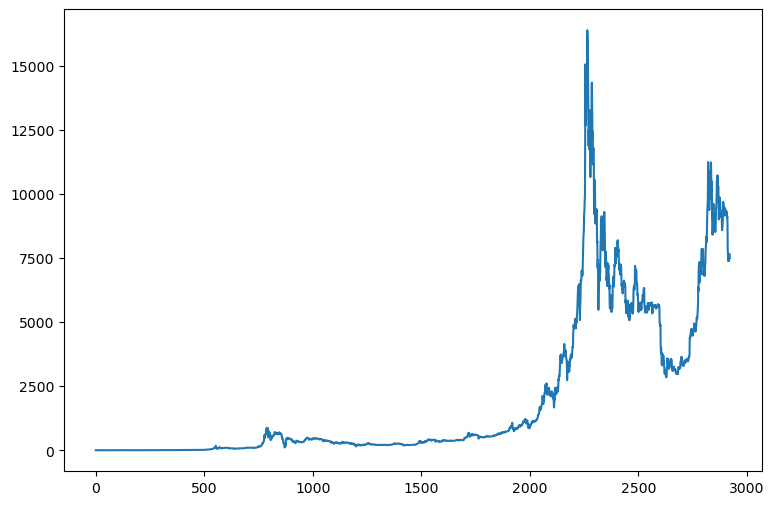

In [14]:
#Pour regarder évolution d'une des valeurs comme close

bitcoin0['Close'].plot(figsize=(9, 6))
plt.show()

Là on voit que nous n'avons pas de date car nous n'avons pas indiqué qu'on voulait une abcisse temporelle donc il a mis des abcisses par défaut comme on peut le voir ci-dessous


In [16]:
bitcoin0.index

RangeIndex(start=0, stop=2923, step=1)

In [17]:
#Pour avoir un index de type Datetime ça commence au début

bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

In [18]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


Là on voit qu'il a remplacé les indexes classiques par les dates 

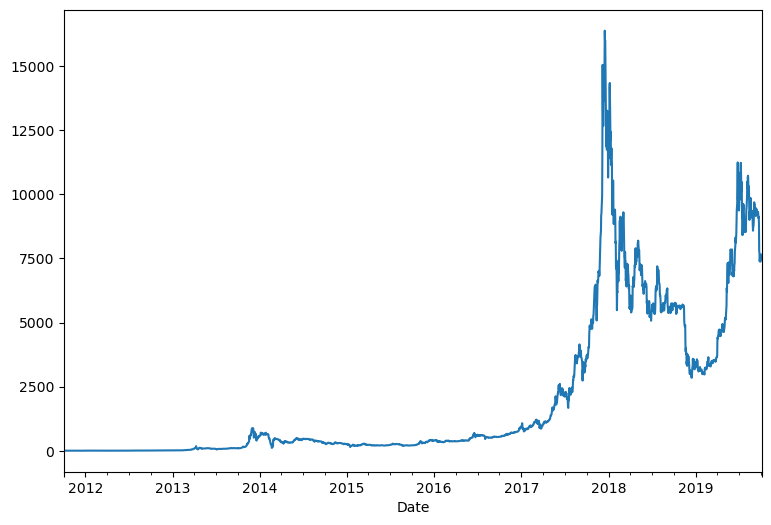

In [20]:
bitcoin['Close'].plot(figsize=(9, 6))
plt.show()

On est bon

On doit dire à panda que la colonne d'indexes doit étre interprété comme des dates d'où la partie "parse_dates=True"

Grace à  ça panda comprend les indexes comme des dates avec jour semaine et année sur lesquels on fpourra faire de l'indexing et du slicing

In [27]:
#Exple

bitcoin['2016':'2019']['Close']

Date
2016-01-01     400.519989
2016-01-02     399.809998
2016-01-03     396.660004
2016-01-04     400.140015
2016-01-05     401.799988
                 ...     
2019-09-30    7626.029785
2019-10-01    7625.560059
2019-10-02    7655.250000
2019-10-03    7516.790039
2019-10-04    7487.083496
Name: Close, Length: 1373, dtype: float64

<Axes: xlabel='Date'>

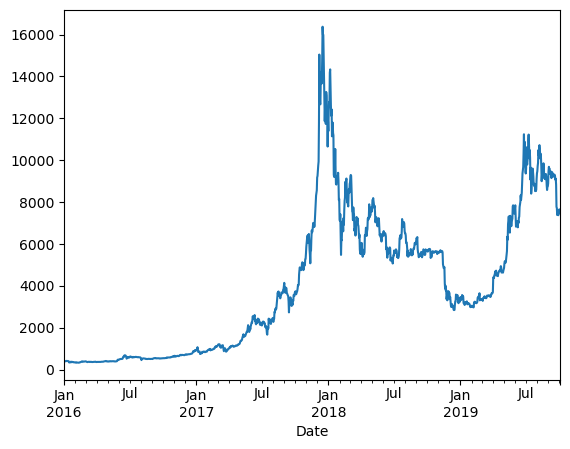

In [32]:
bitcoin['2016':'2019']['Close'].plot() #pour regarder sur un laps de temps défini

<Axes: xlabel='Date'>

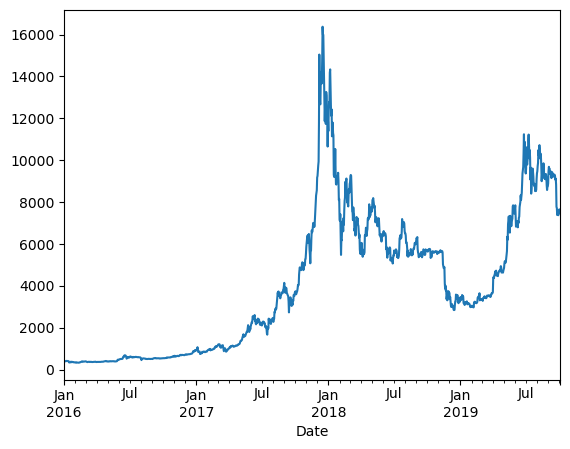

In [33]:
#pareil avec la méthode loc
bitcoin.loc['2016':'2019']['Close'].plot()

In [34]:
#Pandas s'adapte à plusieurs  formats de date, et dans le cas où le fichier a un format bizarre 
#on peut modifier nous méme le format

pd.to_datetime('2019/03/20')

Timestamp('2019-03-20 00:00:00')

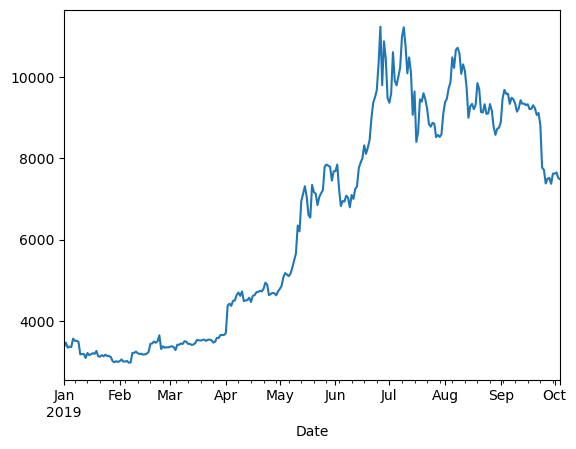

In [35]:
#Resample permet de regrouper les données pour une certaine fréquence
#Exple on va regrouper nos données par mois(monthly end)

#J'arrive pas à copier son code mais la seule différence c'est la couleur pour chaque mois on va s'en passer vu qu'on a déja les mois sur la courbe

bitcoin.loc['2019','Close'].plot()
plt.show()

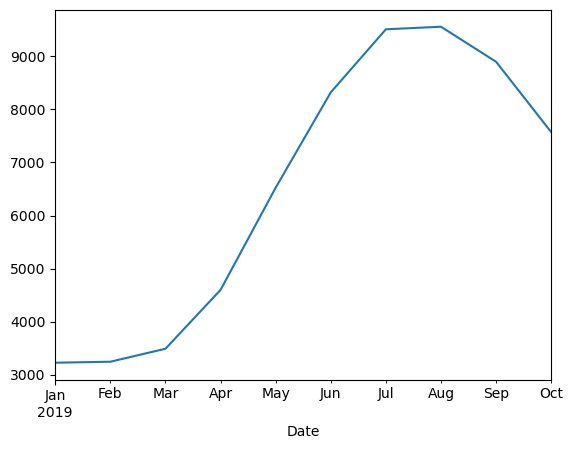

In [36]:
bitcoin.loc['2019','Close'].resample('ME').mean().plot()
plt.show()

#Voilà la courbe des moyennes mensuelles du bitcoin en 2019

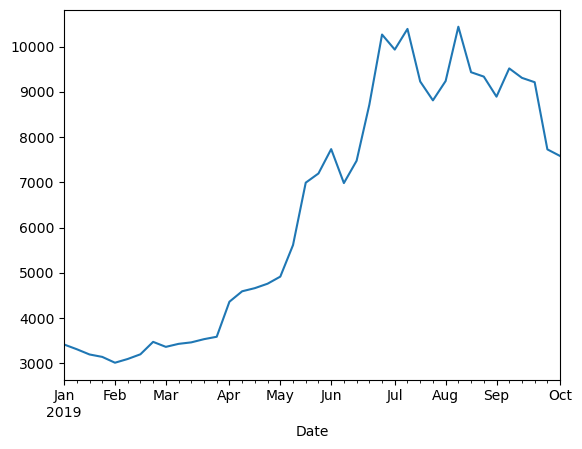

In [38]:
bitcoin.loc['2019','Close'].resample('W').mean().plot()
plt.show()

#Voilà la courbe des moyennes hebdo du bitcoin en 2019

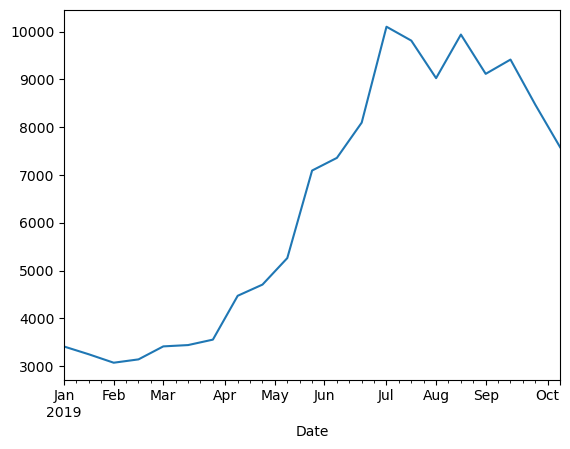

In [39]:
bitcoin.loc['2019','Close'].resample('2W').mean().plot()
plt.show()

#Si tu regardes bien plus tu regroupes les données plus les courbes sont lisses (moins de variations) si tu fais 1D y aura bien 
#plus de volatilité pour le week ou 2weeks

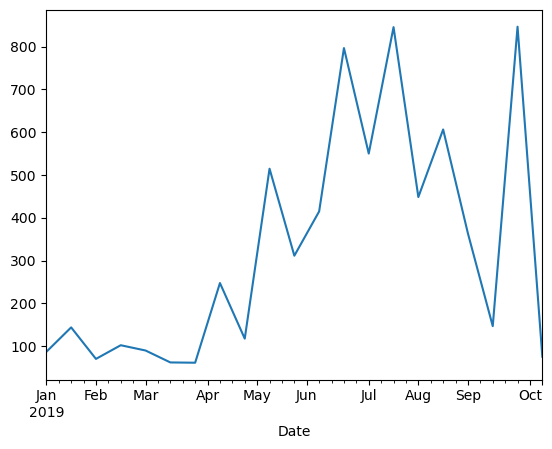

In [41]:
bitcoin.loc['2019','Close'].resample('2W').std().plot()
plt.show()

#l'écart type qui va nous donner l'info sur à quel point le bitcoin était volatile

En début d'année il était plutot stable et après il devient très volatile

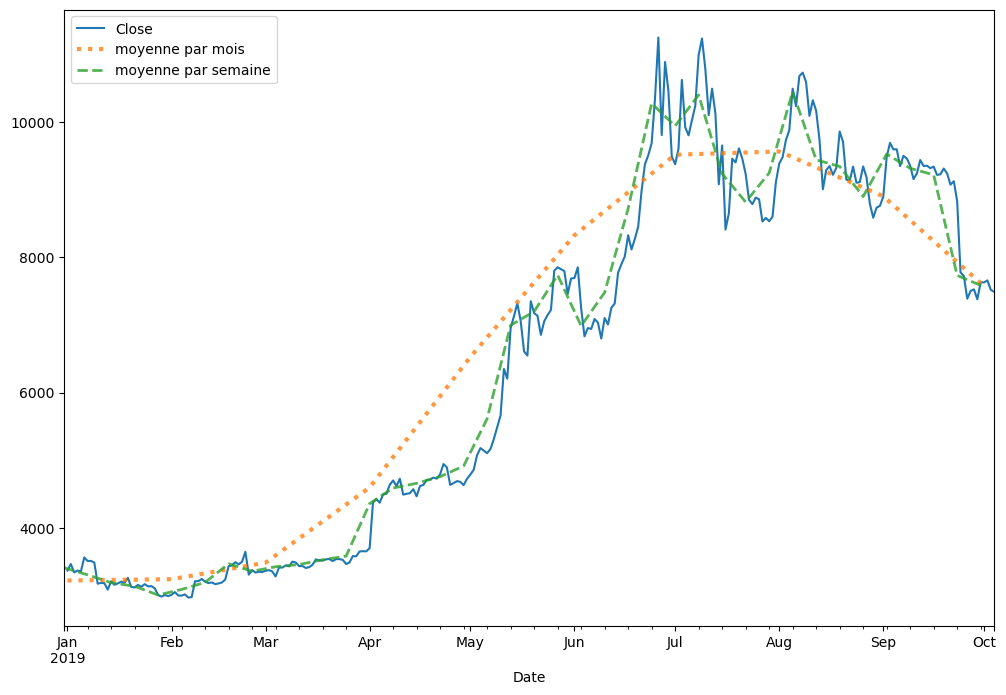

In [43]:
#On peut afficher toutes ces courbes sur un méme 

plt.figure(figsize=(12,8))
bitcoin.loc['2019','Close'].plot()
bitcoin.loc['2019','Close'].resample('ME').mean().plot(label='moyenne par mois',lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

#alpha c'est pour la transparence des lignes alpha=0 totalement transparent alpha=1 totalement opaque

In [44]:
#On utilise bcp agregate avec la fonction resample car elle permet de rassembler dans un tableau plusieurs statistiques qui nous intéress

bitcoin.loc['2019', 'Close'].resample('W').agg(['mean','std','min','max'])

,mean,std,min,max
Date,,,,
2019-01-06,3413.619995,86.412199,3345.330078,3565.800049
2019-01-13,3308.722830,187.370818,3090.370117,3513.979980
2019-01-20,3193.085728,42.170285,3129.989990,3263.669922
2019-01-27,3139.568534,20.884335,3110.709961,3171.270020
2019-02-03,3010.647182,21.591732,2986.850098,3054.060059
2019-02-10,3093.135742,125.474356,2973.739990,3247.080078
2019-02-17,3196.895717,21.848029,3171.590088,3238.939941
2019-02-24,3472.014334,100.274323,3311.520020,3648.610107
2019-03-03,3361.397147,13.607572,3343.159912,3378.629883


Et là on a un beau tableau avec les paramètres souhaités en gros il calcule et les regroupe

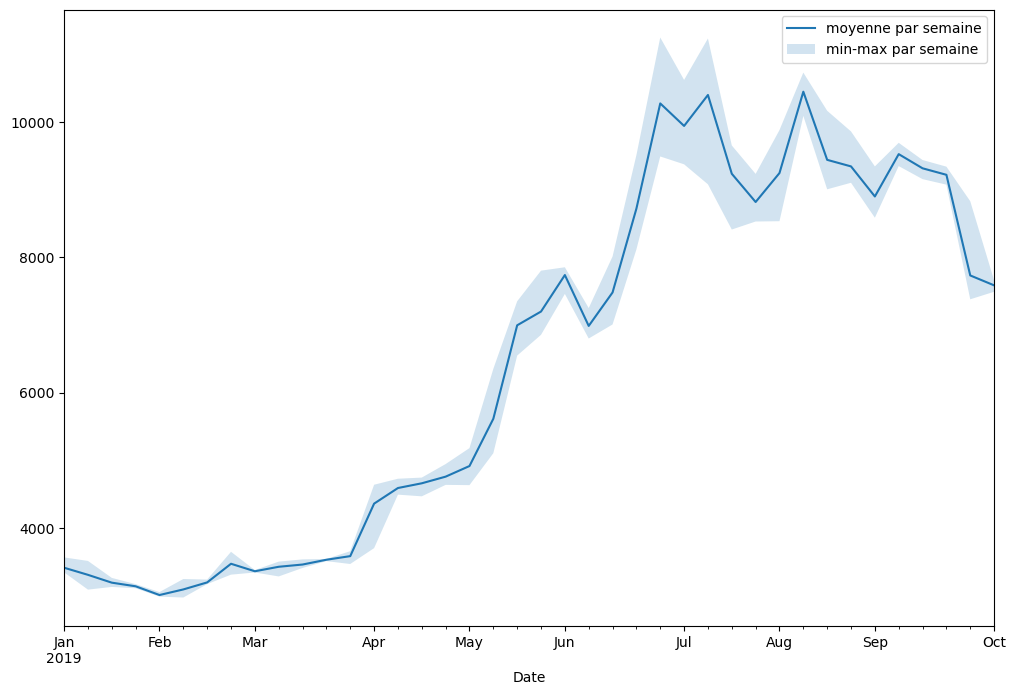

In [46]:
m=bitcoin.loc['2019', 'Close'].resample('W').agg(['mean','std','min','max'])

plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')
plt.legend()
plt.show()

#la moyenne c'est pas min+max/2 
#la fonction fill between sert à rajouter cette couleur entre min et max

**Moving average**

Au lieu de faire une moyenne de toute les valeurs, moyenne sur une fenétre de valeurs puis on se décale
Exple féenétre de 7 jours puis on va décaler d'un jour recalculer ...

Cela sert à lisser les variations de la série temporelle, réduire les luctuations rapides pour mieux identifier les tendances 

In [50]:
bitcoin.loc['2019', 'Close'].rolling(window=7)

Rolling [window=7,center=False,axis=0,method=single]

<Axes: xlabel='Date'>

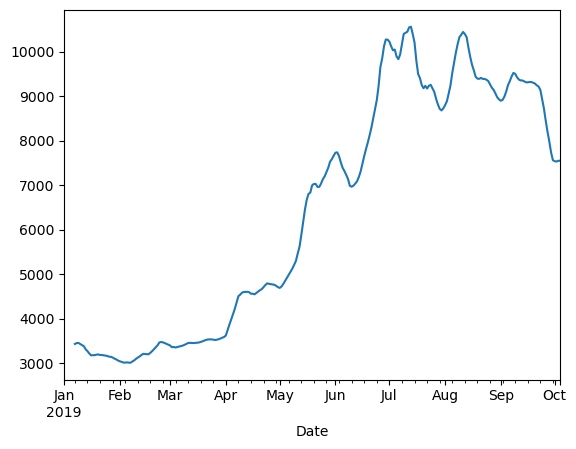

In [51]:
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot()

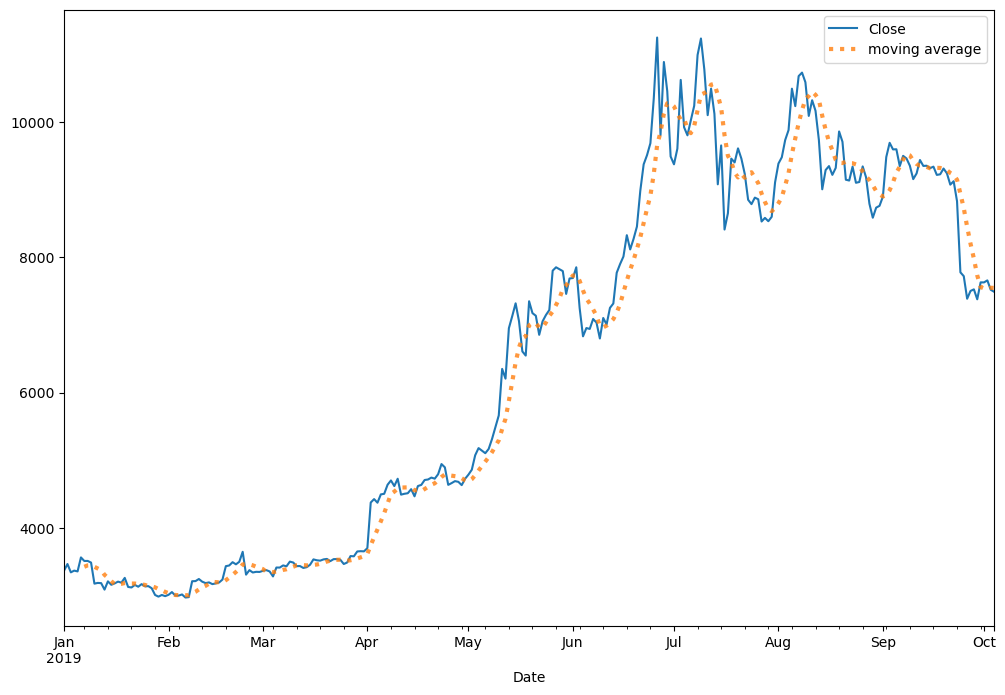

In [52]:
#On superpose sur un graphique avec les données de base


plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

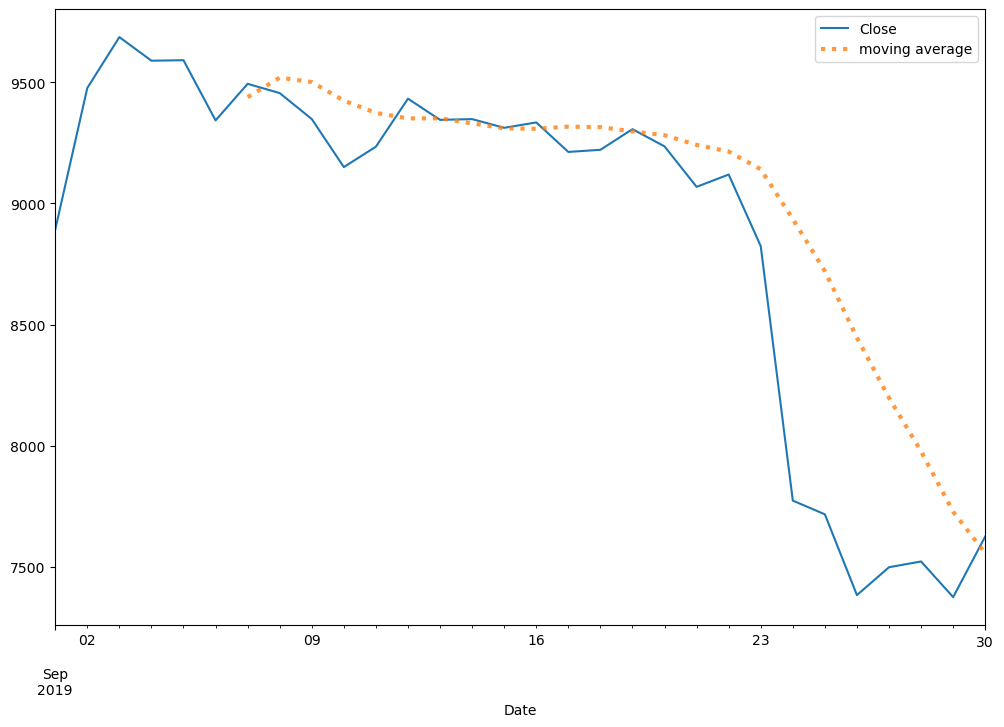

In [55]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

Ici on voit que la moving average ne représente pas les 7 premiers jours parsk logique on a besoin de 7 jours pour avoir une première moyenne 

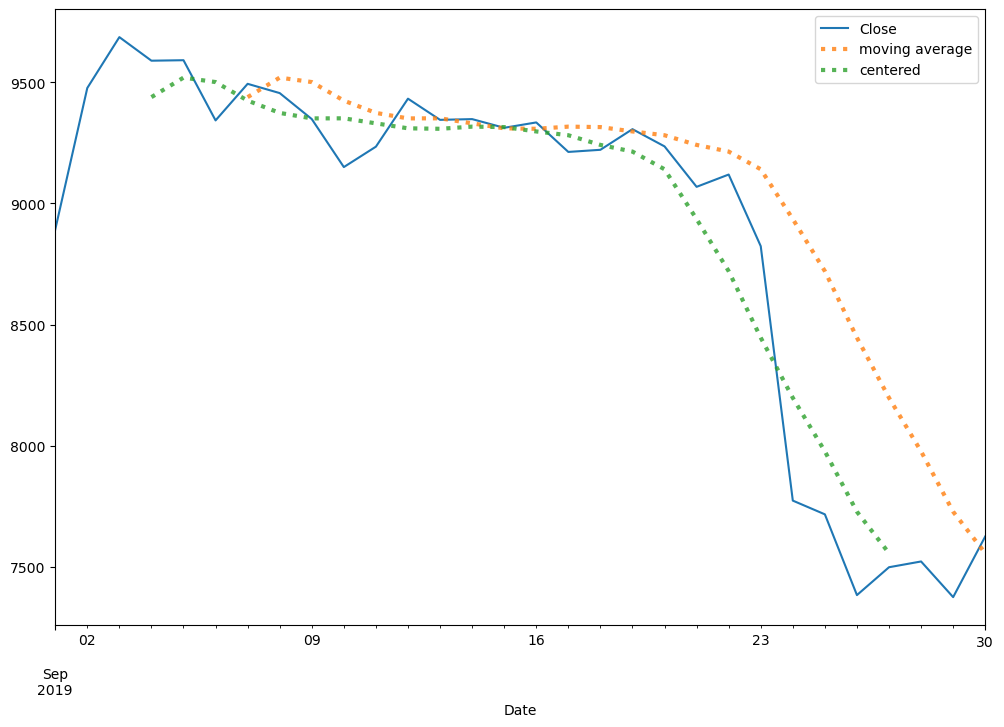

In [58]:
#on va essayer de décaler, placer la moyenne au milieu de cette fenétre en ajoutant center=true 
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centered', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()


Perso je trouve le principe un peu débile

Heureusement y a mieux avec l'exponential weighted average

**Exponential weighted Average**

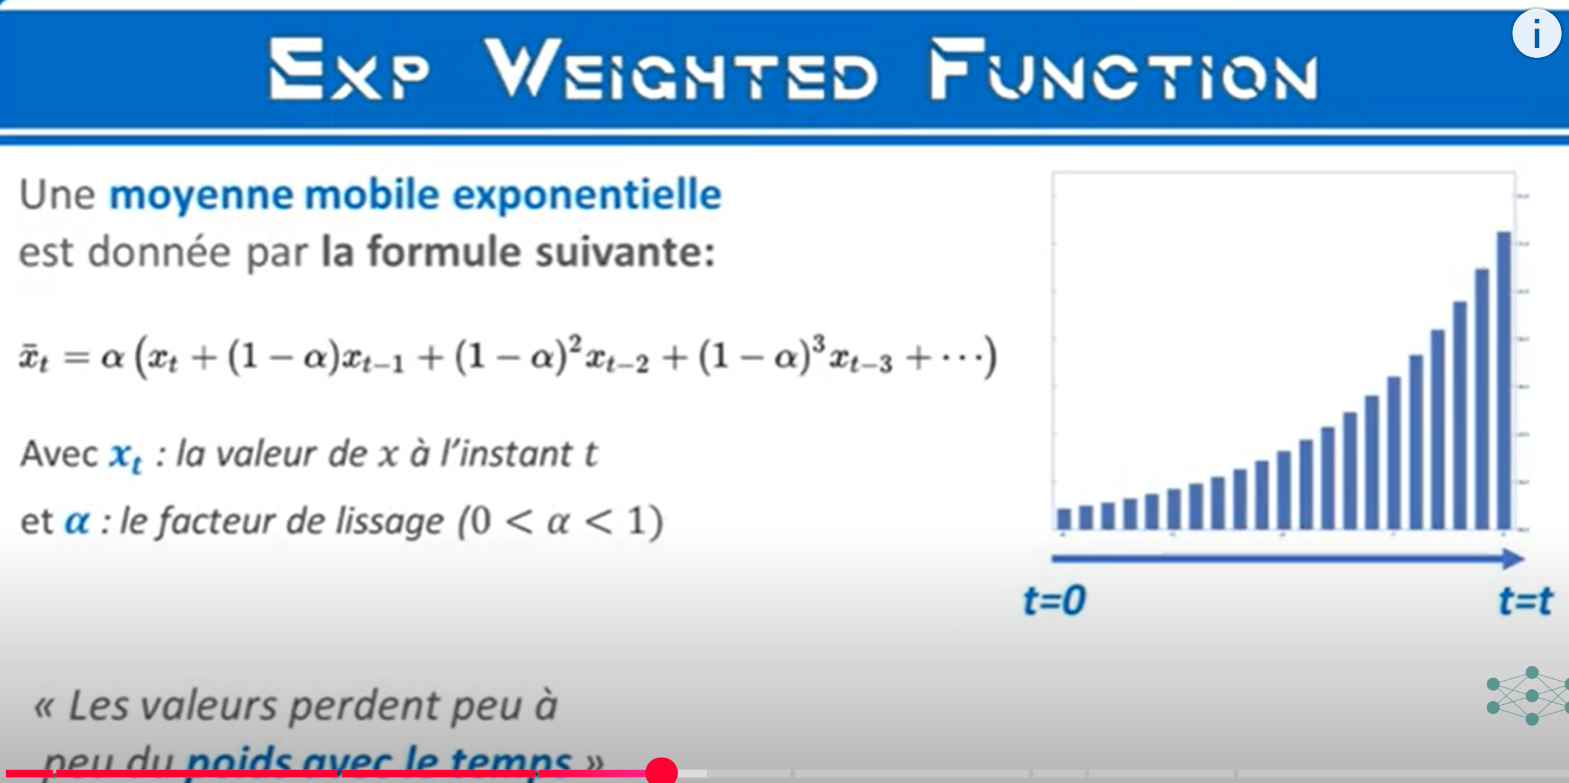

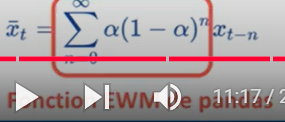

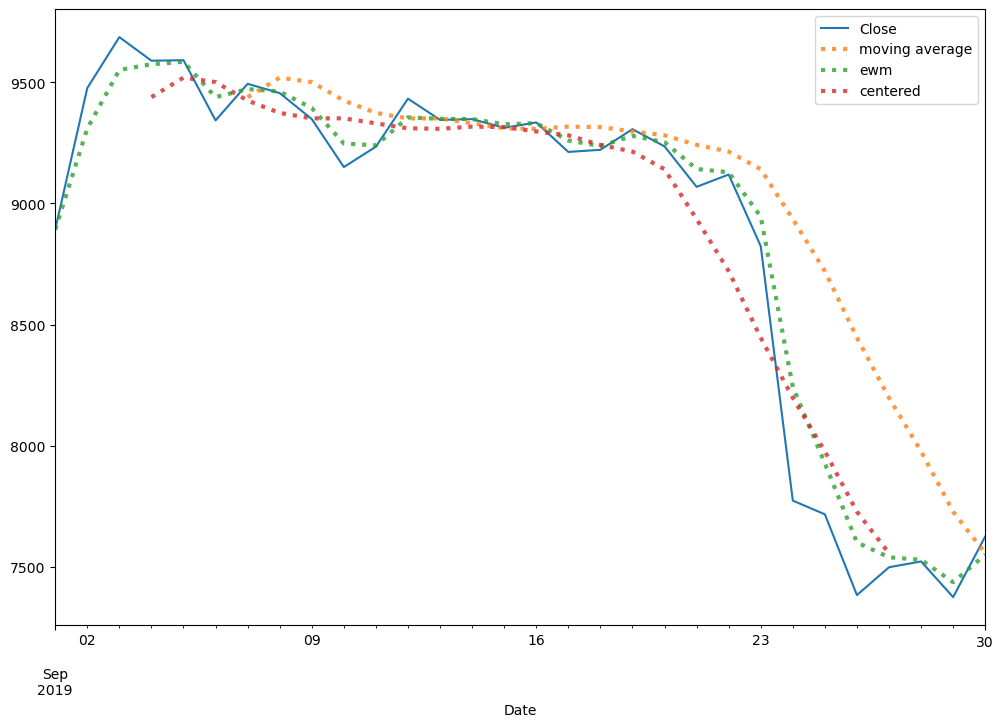

In [65]:
#Fonction EWM de pandas
#tout ce qu'on a à faire c'est définir un panda de manière empirique, on va prendre l'exemple de 0,6

plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centered', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

On voit que l'ewm suit un peu mieux notre courbe de base que la moyenne mobile et celle centered

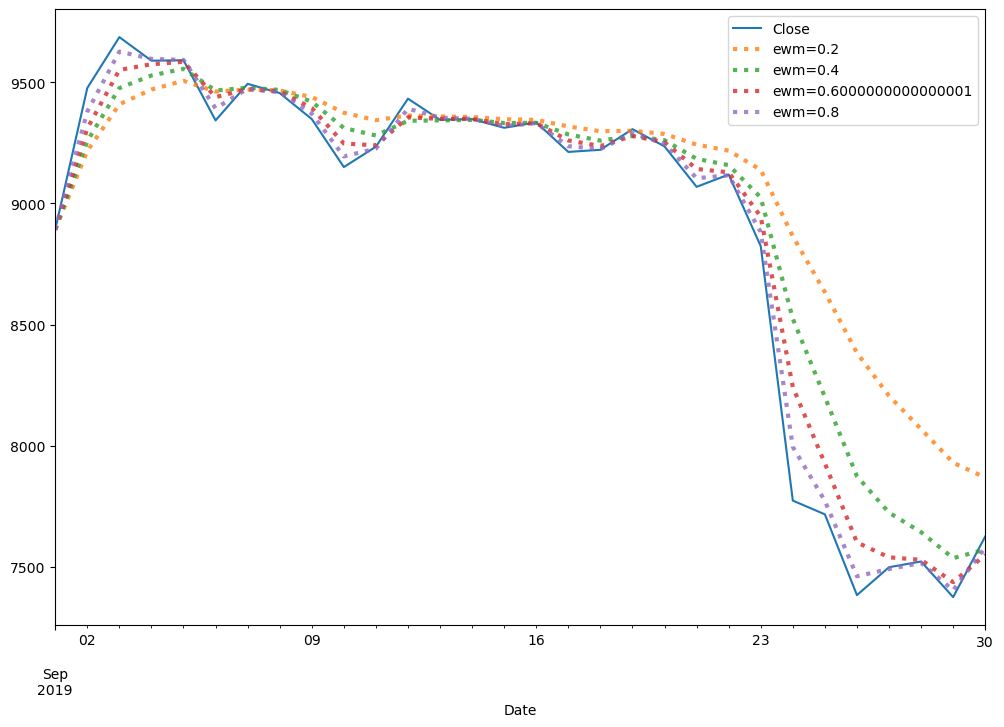

In [69]:
#Pour la détermination du alpha idéal on peut comparer différentes valeurs de alpha avec une boucle for

plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm={i}', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

On voit que le plus précis c'est 0.8 comme alpha

**ASSEMBLER DES DATASETS**

Nous allons par exemple comparer le bitcoin avec une autre monnaie l'ETH

l'ETH est plus récent que le bitcoin et on donc de svaleurs qui commencent en 2015 et pas 2014

Avec numpy ça aurait été compliqué mais pas de problème avec Pandas

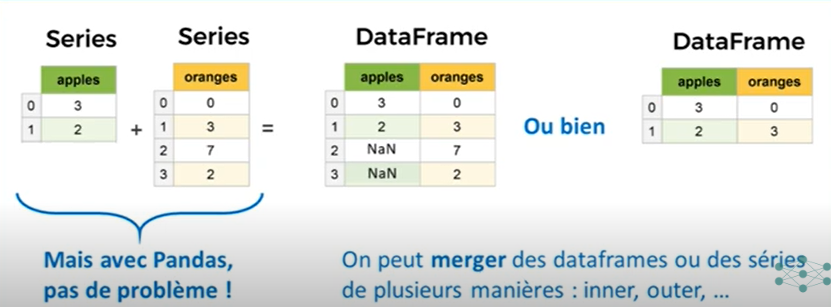

In [78]:
#on uploade l'excel
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)
ethereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,0.593,20.000,0.5930,2.56,2.56,15200
2015-08-08,2.560,2.598,0.5616,0.65,0.65,32816
2015-08-09,0.650,0.800,0.5235,0.70,0.70,4041
2015-08-10,0.700,0.750,0.5850,0.68,0.68,5645
2015-08-11,0.680,1.008,0.5915,0.95,0.95,21607


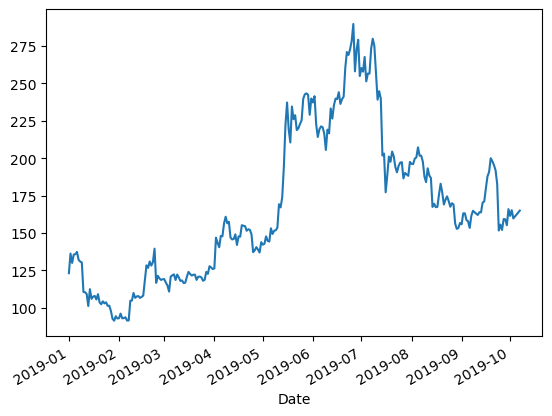

In [80]:
ethereum.loc['2019','Close'].plot()
plt.show()

Ca ressemble un peu à celle du bitcoin, on va vérifier cela

In [84]:
pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

#Les 2 dataframe , on='date' pour dire que c'est la colonne sur laquelle on fait 
#l'assemblage étant donné qu'elle est commune aux 2, le how c'est la façon d'assembler 

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2015-08-07,255.710007,258.880005,253.639999,256.250000,256.250000,1446808,0.593000,20.000000,0.593000,2.560000,2.560000,15200
2015-08-08,256.250000,257.029999,239.279999,240.199997,240.199997,1426996,2.560000,2.598000,0.561600,0.650000,0.650000,32816
2015-08-09,240.199997,246.110001,239.039993,243.910004,243.910004,797790,0.650000,0.800000,0.523500,0.700000,0.700000,4041
2015-08-10,243.910004,248.039993,240.779999,241.679993,241.679993,1135445,0.700000,0.750000,0.585000,0.680000,0.680000,5645
2015-08-11,241.679993,247.190002,240.399994,245.759995,245.759995,1472221,0.680000,1.008000,0.591500,0.950000,0.950000,21607
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-29,7523.009766,7541.020020,7247.169922,7375.950195,7375.950195,39755968,159.130005,159.779999,150.610001,155.160004,155.160004,7857348
2019-09-30,7375.950195,7667.890137,7075.589844,7626.029785,7626.029785,101457908,155.160004,166.649994,151.229996,165.910004,165.910004,15659055
2019-10-01,7626.029785,7818.279785,7535.799805,7625.560059,7625.560059,75644316,165.910004,170.710007,159.330002,161.410004,161.410004,11427525


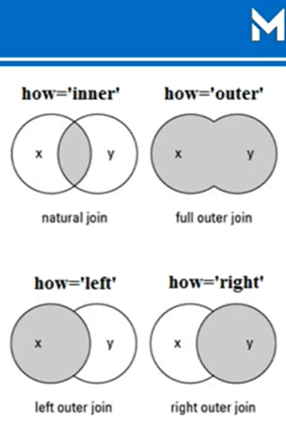

On voit que les dates commencent en 2015, on a donc mis à la poubelle toutes les données du bitcoin avant ça

Inner sert donc à assembler les dataframes sur les indexes qu'ils ont en commun

In [89]:
#outer te mettrait tout 

pd.merge(bitcoin, ethereum, on='Date', how='outer', suffixes=('_btc', '_eth'))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2011-10-04,3.700000,3.821000,3.746000,3.750000,3.750000,1.357000e+03,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-05,3.750000,3.820000,3.650000,3.676000,3.676000,3.349000e+03,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-06,3.676000,3.743000,3.450000,3.550000,3.550000,6.642000e+03,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-07,3.550000,3.590000,2.900000,3.293000,3.293000,7.135000e+03,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-08,3.293000,3.283000,2.872000,2.890000,2.890000,2.007000e+03,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,7626.029785,7818.279785,7535.799805,7625.560059,7625.560059,7.564432e+07,165.910004,170.710007,159.330002,161.410004,161.410004,11427525.0
2019-10-02,7625.560059,7663.270020,7489.770020,7655.250000,7655.250000,5.187133e+07,161.410004,165.740005,159.699997,165.240005,165.240005,5760811.0
2019-10-03,7655.250000,7685.930176,7379.220215,7516.790039,7516.790039,4.943731e+07,165.240005,165.520004,154.960007,159.690002,159.690002,7711746.0


In [90]:
pd.merge(bitcoin, ethereum, on='Date', how='right', suffixes=('_btc', '_eth'))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2015-08-07,255.710007,258.880005,253.639999,256.250000,256.250000,1446808.0,0.593000,20.000000,0.593000,2.560000,2.560000,15200
2015-08-08,256.250000,257.029999,239.279999,240.199997,240.199997,1426996.0,2.560000,2.598000,0.561600,0.650000,0.650000,32816
2015-08-09,240.199997,246.110001,239.039993,243.910004,243.910004,797790.0,0.650000,0.800000,0.523500,0.700000,0.700000,4041
2015-08-10,243.910004,248.039993,240.779999,241.679993,241.679993,1135445.0,0.700000,0.750000,0.585000,0.680000,0.680000,5645
2015-08-11,241.679993,247.190002,240.399994,245.759995,245.759995,1472221.0,0.680000,1.008000,0.591500,0.950000,0.950000,21607
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,7375.950195,7667.890137,7075.589844,7626.029785,7626.029785,101457908.0,155.160004,166.649994,151.229996,165.910004,165.910004,15659055
2019-10-01,7626.029785,7818.279785,7535.799805,7625.560059,7625.560059,75644316.0,165.910004,170.710007,159.330002,161.410004,161.410004,11427525
2019-10-02,7625.560059,7663.270020,7489.770020,7655.250000,7655.250000,51871334.0,161.410004,165.740005,159.699997,165.240005,165.240005,5760811


*Globalement tu joues sur les indexes avec le how*

<Axes: xlabel='Date'>

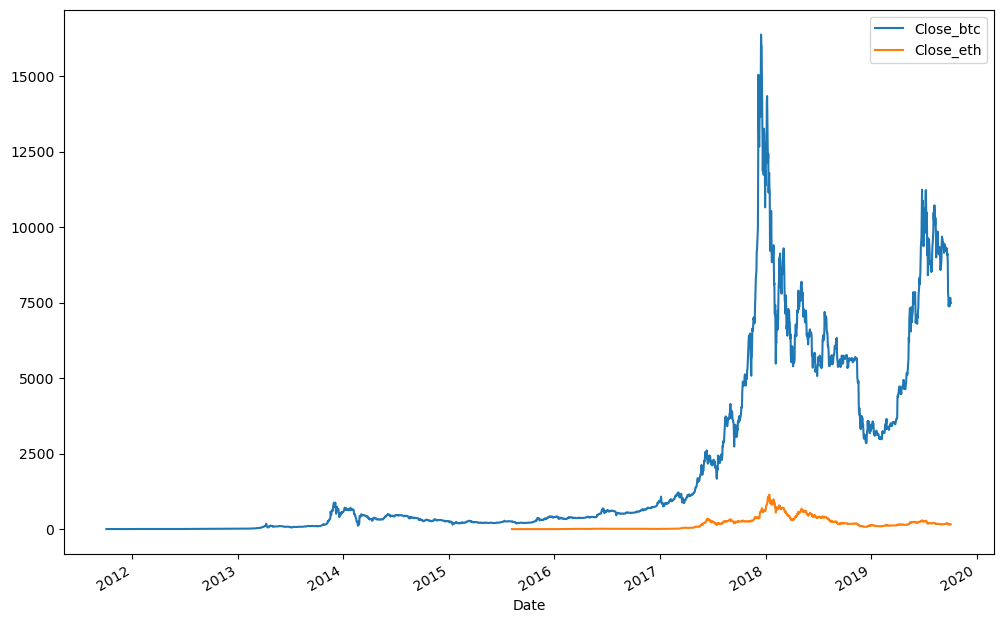

In [93]:
#On va travailler avec le outer plus simple
btc_eth= pd.merge(bitcoin, ethereum, on='Date', how='outer', suffixes=('_btc', '_eth'))
btc_eth[['Close_btc', 'Close_eth']].plot(figsize=(12,8))

La lecture de l'ethereum est compliquée vu qu'on n'est pas sur les mémes échelles

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

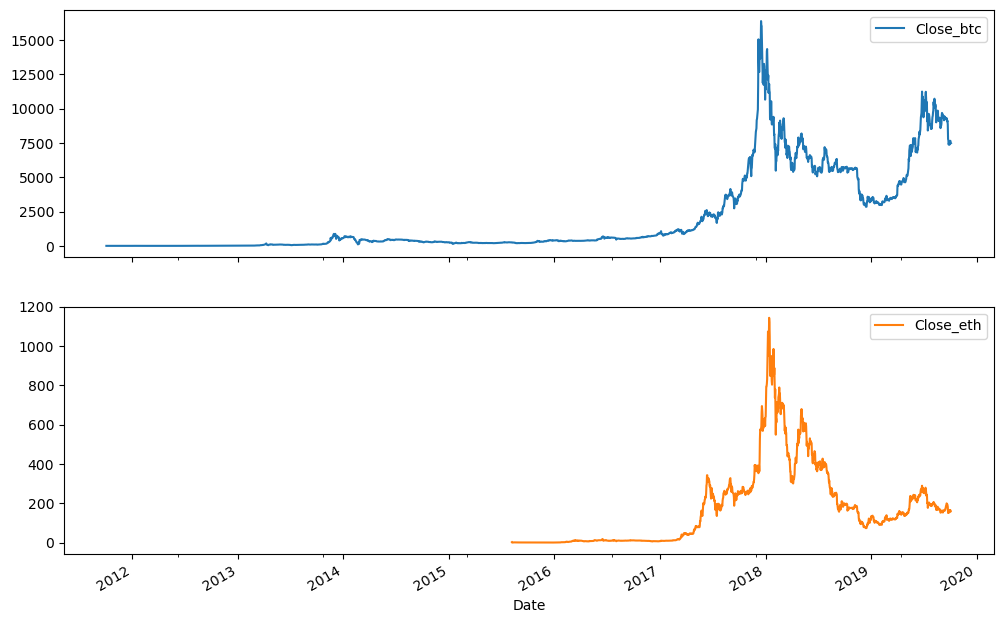

In [96]:
#On ajoute donc subplots pour séparer les graphes 

btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12,8))


Au vu des allures, on peut dire que les 2 sont super bien corrélés. On peut définir cette corrélation



In [99]:
btc_eth[['Close_btc','Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.791416
Close_eth,0.791416,1.000000


Corrélation de 79% ce qui est élevé

**TRADING STRATEGY**

On va apprendre ce qu'est la stratégie de la tortue : c'est une stratégie de bourse à court-terme.
L'investisseur achétent lorsque les prix augmentent au-dessus de la fourchette récente(28 jours) puis vend quand les prix diminuent en dessous de la fourchette récente

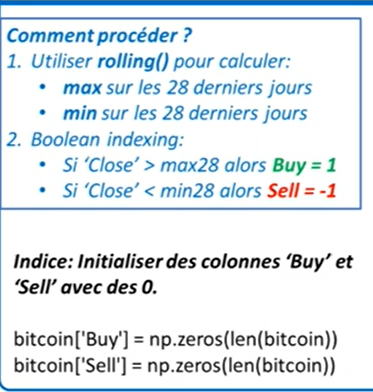

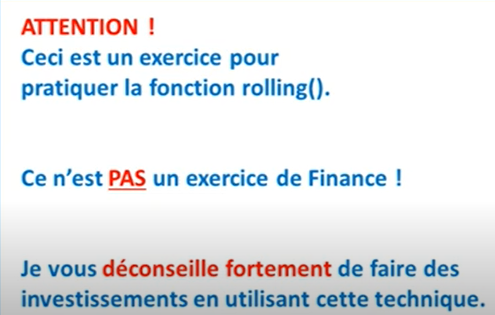

La volatilité du bitcoin est trop extreme pour que cette technique puisse marcher on peut avoir les prix qui montent depuis 28 jours et le jour d'après le prix peut étre divisé par 4 donc bon... 

**Graphiques interactifs**


On utilise là une autre bibliothèque qui s'appelle bokeh qui est fait avec du javascript qui est interactif par rapport à matplotlib.
Matplotlib te sort juste une image avec laquelle on peut rien faire

In [110]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [112]:
output_notebook()

Loading BokehJS ...

In [124]:
pl= figure(x_axis_type="datetime", title="Crypto Prices", width=800)
pl.grid.grid_line_alpha=0.3
pl.xaxis.axis_label='Date'
pl.yaxis.axis_label='Price'

pl.line(bitcoin.index, bitcoin['Close'], color= '#F2a900' , legend_label='Bitcoinzer')
pl.line(ethereum.index, bitcoin['Close'], color= '#6ACEE3' , legend_label='Ethereumzer')

pl.legend.location = "top_right"
show(pl)

Après s'il faut mettre le graphe sur un pdf matplotlib sera mieux mais je pourrai faire des screens de bokeh pour regarder des zones points spécifiques

**Exporter sur Excel**

In [150]:
writer = pd.ExcelWriter('CryptosDatas.xlsx')

In [152]:
bitcoin.to_excel(writer, sheet_name='Bitcoin')

In [153]:
ethereum.to_excel(writer, sheet_name='Ethereum')

In [155]:
writer.close()

Avec ces 4 lignes j'ai créé l'excel et peux le trouver dans Home là où sont tous mes projets sur jupnotebook 

error: incomplete escape \U at position 28

In [ ]:
pi